# NYC Taxi Trip Duration Problem


## Problem Statement

We are provided with a Dataset for a Taxi service provider operating in the city of New York. We are required to form Exploratory Data Analysis on the given dataset to find insights which can help estimate the approximate time it would take a trip to be completed so that the Service Provider can deploy his fleet of Cabs in an efficacious manner.



In [4]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from geopy.distance import great_circle

In [5]:
# Reading the Dataset

data = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Documents\\harsh material\\Internshala JOS Data Science\\Course 2 - Exploratory Data Analysis (EDA)\\Project\\Resources-NYC Taxi Trip Project\\nyc_taxi_trip_duration.csv")

In [6]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


The Dataset consists of the following variables:

1) id — a unique identifier for each trip

2) vendor_id — a code indicating the provider associated with the trip record

3) pickup_datetime — date and time when the meter was engaged

4) dropoff_datetime — date and time when the meter was disengaged

5) passenger count — the number of passengers in the vehicle (driver entered value)

6) pickup longitude — the longitude where the meter was engaged

7) pickup latitude — the latitude where the meter was engaged

8) dropoff_longitude — the longitude where the meter was disengaged

9) dropoff_latitude — the latitude where the meter was disengaged

10) store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

11) trip_duration — (target) duration of the trip in seconds

In [8]:
# Checking the shape of the Dataset

data.shape

(729322, 11)

In [9]:
# Taking a look at the statistics of the variables in the dataset

data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [10]:
#Verifying for missing values in the dataset

data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Observations :

1) The data set has 729032 rows and 11 columns

2) The number of rows is equal to the count variable which implies that there are no missing values. This is further verified by isnull().sum()

3) Range for passenger count is 0 to 9

4) There are 2 types of Vendors in the dataset.



In [11]:
#Checking the data types of the variables

data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [12]:
#Integer valued variables

data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [13]:
# Float valued variables

data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [14]:
# Object type variables

data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

Observations:
    
1) pickup_datetime and dropoff_datetime need to be changed into datetime format to perform EDA

2) store_and_fwd_flag needs to be changed to Categorical type

In [15]:
data['pickup_datetime'] = data['pickup_datetime'].astype('datetime64[ns]')
data['dropoff_datetime'] = data['dropoff_datetime'].astype('datetime64[ns]')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [16]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [17]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

#Day of the Week
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

#Weekdays
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

#Month of the year
data['P_Month']=data['pickup_datetime'].dt.month_name()
data['D_Month']=data['dropoff_datetime'].dt.month_name()

#Hours
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

#Minutes
data['pickup_minute']=data['pickup_datetime'].dt.minute
data['dropoff_minute']=data['dropoff_datetime'].dt.minute

In [18]:
data[['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_day_no','dropoff_day_no','P_Month','D_Month','pickup_hour','dropoff_hour','pickup_minute','dropoff_minute']].head()

,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,P_Month,D_Month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday,0,0,February,February,16,16,40,47
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday,4,4,March,March,23,23,35,53
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday,6,6,February,February,17,18,59,26
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday,1,1,January,January,9,10,44,3
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday,2,2,February,February,6,6,42,56


In [19]:
# Calculating Distance of the trip using the pickup and dropoff coordinates


def distance_trip(pickup_latitude,pickup_longitude, dropoff_latitude,dropoff_longitude):
    start_coordinates = (pickup_latitude,pickup_longitude)
    stop_coordinates = (dropoff_latitude,dropoff_longitude)
    return great_circle(start_coordinates,stop_coordinates).km


data['distance'] = data. apply(lambda x: distance_trip(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis = 1)

In [20]:
# Segregating trips by their duration into categories

def Duration(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'
    
data['pickup_timeofday'] = data['pickup_hour'].apply(Duration)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(Duration)

In [19]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day_no,P_Month,D_Month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,February,February,16,16,40,47,1.199074,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,March,March,23,23,35,53,4.129117,Late Night,Late Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,February,February,17,18,59,26,7.250763,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,January,January,9,10,44,3,2.361101,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,February,February,6,6,42,56,4.328540,Morning,Morning


## UNIVARIATE ANALYSIS

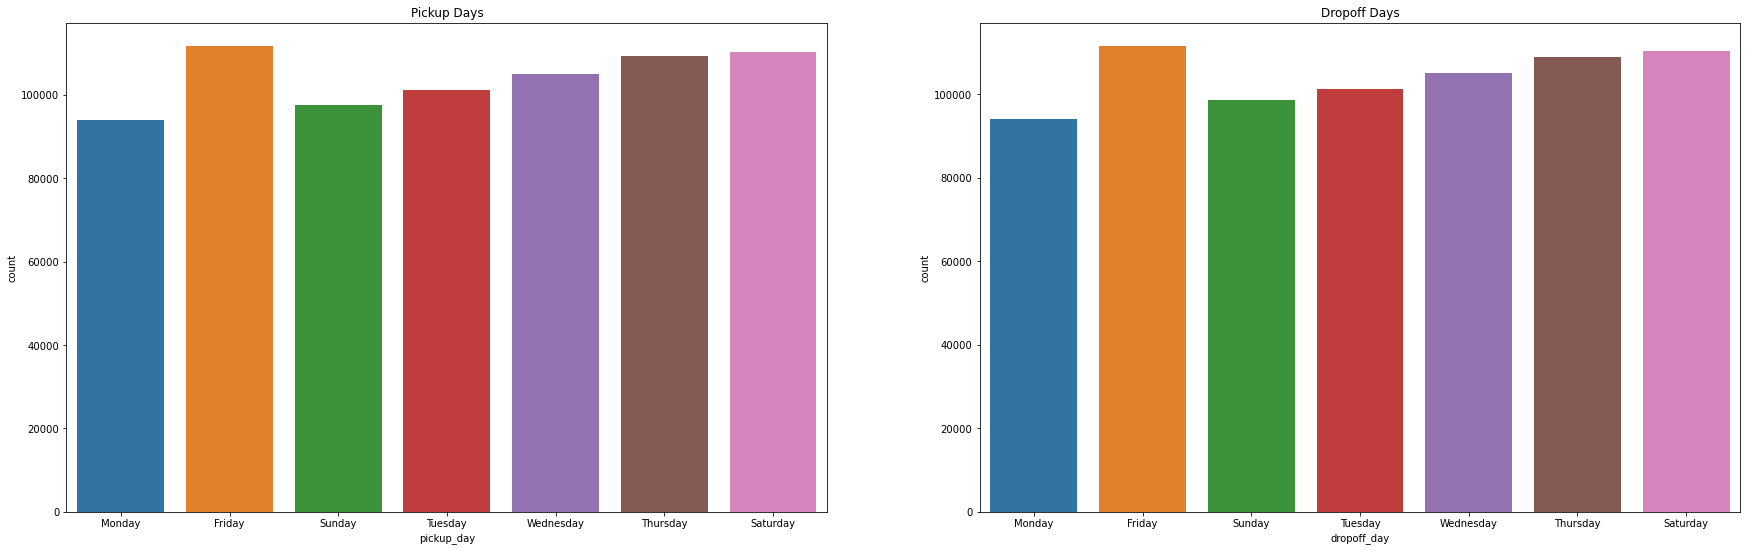

In [21]:
#Observing Pickup and Dropoff week

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(30,9))
ax1.set_title('Pickup Days')
ax = sns.countplot(x='pickup_day',data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax = sns.countplot(x='dropoff_day',data=data,ax=ax2)

OBSERVATION:

Friday is the busiest day of the week with the most pickups and dropoffs.

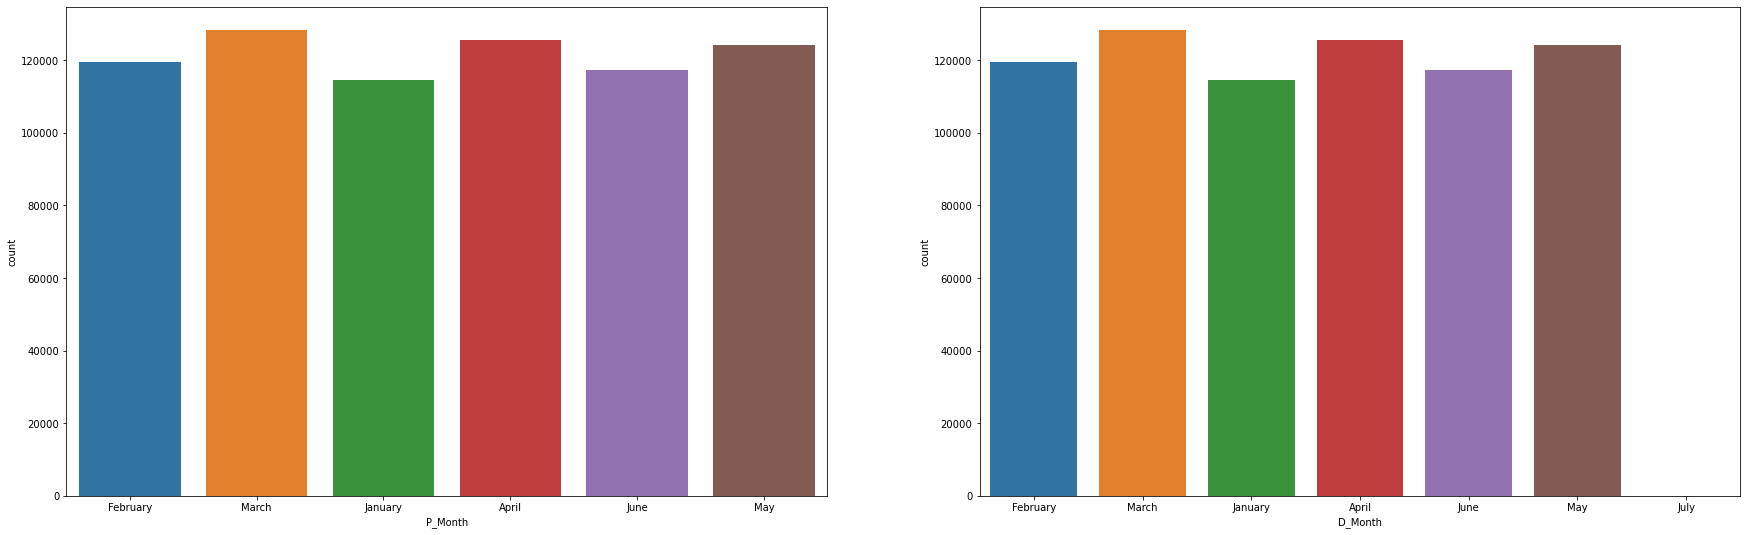

In [22]:
#Observing Months of the year

figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(30,9))
ax1.set_title('P_Month')
ax = sns.countplot(x='P_Month',data=data,ax=ax3)
ax2.set_title('D_Month')
ax = sns.countplot(x='D_Month',data=data,ax=ax4)

OBSERVATION:

March is the busiest month followed by April

In [23]:
#Observing which trips are recorded and which are not

data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994461
Y    0.005539
Name: store_and_fwd_flag, dtype: float64

OBSERVATION:

99% of the Trip is not Recorded in the server.

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

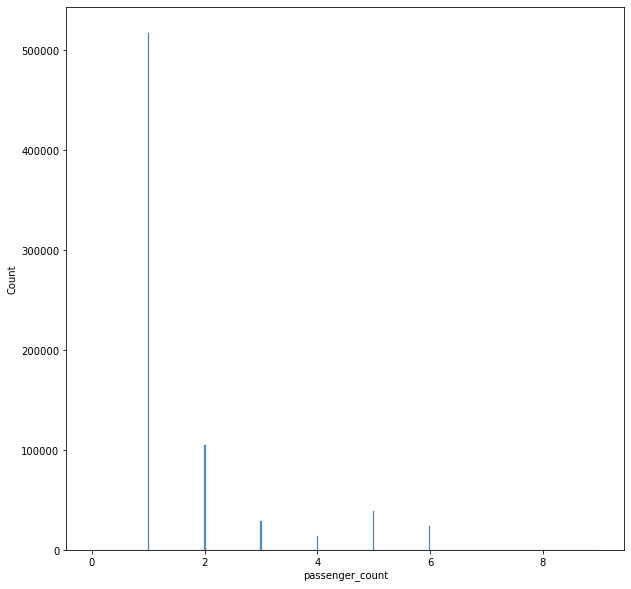

In [24]:
#Observing Passenger count distribution

plt.figure(figsize = (10,10))
sns.histplot(data['passenger_count'])

data['passenger_count'].value_counts()

OBSERVATION:

1) Most passenger density is between 1 and 2

2) There are only 2 trips with 7 and 9 passengers

3) There are 33 trips with 0 passengers. This implies that the trips might have been cancelled or were not completed.

<AxesSubplot:>

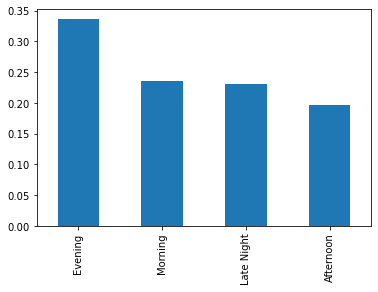

In [25]:
#Observing different trip time of the day

data['dropoff_timeofday'].value_counts(normalize=True).plot(kind='bar')

OBSERVATIONS:

Most trips happen in Evening followed by Morning. This is logical as most people use Taxi services to commute to their workplaces from their homes and vice versa.

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration'>

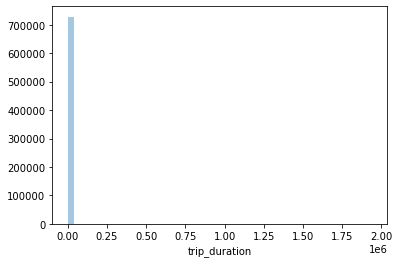

In [26]:
# Observing trip durations

sns.distplot(data['trip_duration'],kde=False)

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

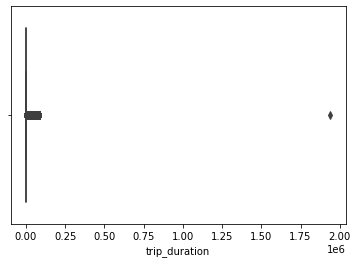

In [27]:
sns.boxplot(data['trip_duration'],orient = 'horizontal')

In [28]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

OBSERVATIONS:

1) The distribution plot is Right Skewed. This implies that most of the trip durations are short.

2) Boxplot also confirms that most of the trip durations are short. The boxplot also shows the presence of outliers in trip durations.

3) The Outlier value is 1939736. So we need to trop that value.

In [41]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

In [42]:
#Observing Average speed of the Taxi Drivers.

data['average_speed'] = data['distance']/(data['trip_duration']/3600)
data['average_speed'].head()

0    10.791669
1    13.513473
2    15.964983
3     7.449573
4    18.375877
Name: average_speed, dtype: float64

OBSERVATIONS:

The average speeds of the Taxi Drivers are really low. This implies heavy traffic in New York City.
    

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

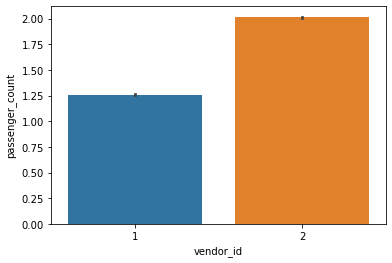

In [43]:
#Observing Passengers and Vendor ID

sns.barplot(y='passenger_count',x='vendor_id',data=data)

OBSERVATIONS:

1) Most people prefer Vendor 2.

2) This can imply poor service from Vendor 1.


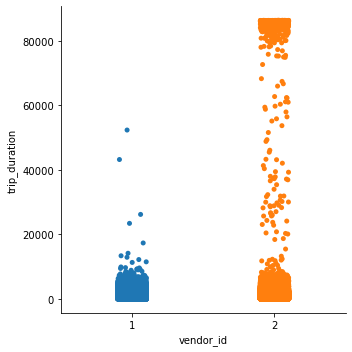

In [44]:
#Comparing trip duration with vendor ID

sns.catplot(y='trip_duration',x='vendor_id',data=data)

OBSERVATIONS:

Vendor 1 only offers short trips whereas vendor 2 offers both short and long trips.

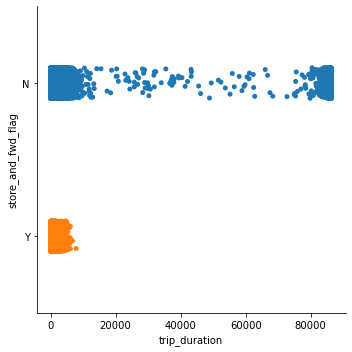

In [50]:
#Observing store_and_fwd_flag and Trip duration

sns.catplot(x='trip_duration',y='store_and_fwd_flag',kind='strip',data=data)

OBSERVATIONS:

Longer Trips are not Recorded whereas the Short Trips are recorded.

In [52]:
#Findind the Correlation between different variables of the Dataset

#isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','int64'])[:]
numerical.dtypes

#calculating correlation
correlation = numerical.dropna().corr()
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance,average_speed
vendor_id,1.000000,0.286462,0.008202,0.002857,0.002371,0.005260,0.035205,0.000786,0.000899,0.009769,9.701486e-03,0.000051,1.449098e-04,0.006516,0.001307
passenger_count,0.286462,1.000000,0.001164,-0.004698,-0.000027,-0.003944,0.016520,0.025757,0.025940,0.009849,9.213857e-03,-0.000213,-3.129552e-05,0.009178,-0.002637
pickup_longitude,0.008202,0.001164,1.000000,0.047648,0.780649,0.118472,0.041561,-0.016027,-0.016844,0.010762,1.117182e-02,-0.003696,-1.917578e-03,0.251472,0.095279
pickup_latitude,0.002857,-0.004698,0.047648,1.000000,0.119972,0.479358,-0.044442,-0.029078,-0.029257,0.011424,1.805920e-02,0.002838,7.303935e-04,-0.128440,0.116820
dropoff_longitude,0.002371,-0.000027,0.780649,0.119972,1.000000,0.149598,0.025331,-0.001472,-0.001396,-0.022014,-2.319331e-02,-0.003605,-2.504285e-03,0.132353,0.045955
dropoff_latitude,0.005260,-0.003944,0.118472,0.479358,0.149598,1.000000,-0.035451,-0.022027,-0.022396,0.014259,1.817335e-02,0.002801,-5.076340e-04,-0.153765,-0.054264
trip_duration,0.035205,0.016520,0.041561,-0.044442,0.025331,-0.035451,1.000000,-0.001954,-0.003706,0.005488,4.082423e-03,-0.004527,-5.622095e-03,0.152153,-0.033842
pickup_day_no,0.000786,0.025757,-0.016027,-0.029078,-0.001472,-0.022027,-0.001954,1.000000,0.993790,-0.082082,-8.576719e-02,-0.000052,-3.499387e-04,0.007792,0.044303
dropoff_day_no,0.000899,0.025940,-0.016844,-0.029257,-0.001396,-0.022396,-0.003706,0.993790,1.000000,-0.078779,-8.987681e-02,0.002244,-2.775322e-03,0.008230,0.043575
pickup_hour,0.009769,0.009849,0.010762,0.011424,-0.022014,0.014259,0.005488,-0.082082,-0.078779,1.000000,9.345925e-01,-0.003544,-2.756920e-03,-0.016258,-0.064611


In [54]:
# Finding Pearson Coefficient 

c = numerical.corr().abs()
s=c.unstack()
so = s.sort_values(kind='quicksort',ascending=False)
so = pd.DataFrame(so,columns=['Pearson Coefficient'])
so[so['Pearson Coefficient']<1].head(25)

,,Pearson Coefficient
pickup_day_no,dropoff_day_no,0.993790
dropoff_day_no,pickup_day_no,0.993790
pickup_hour,dropoff_hour,0.934592
dropoff_hour,pickup_hour,0.934592
dropoff_longitude,pickup_longitude,0.780649
pickup_longitude,dropoff_longitude,0.780649
distance,average_speed,0.575085
average_speed,distance,0.575085
pickup_latitude,dropoff_latitude,0.479358
dropoff_latitude,pickup_latitude,0.479358


OBSERVATIONS:

Pickup Day and Dropoff Day have the highest coorelation amoongst all the variables.

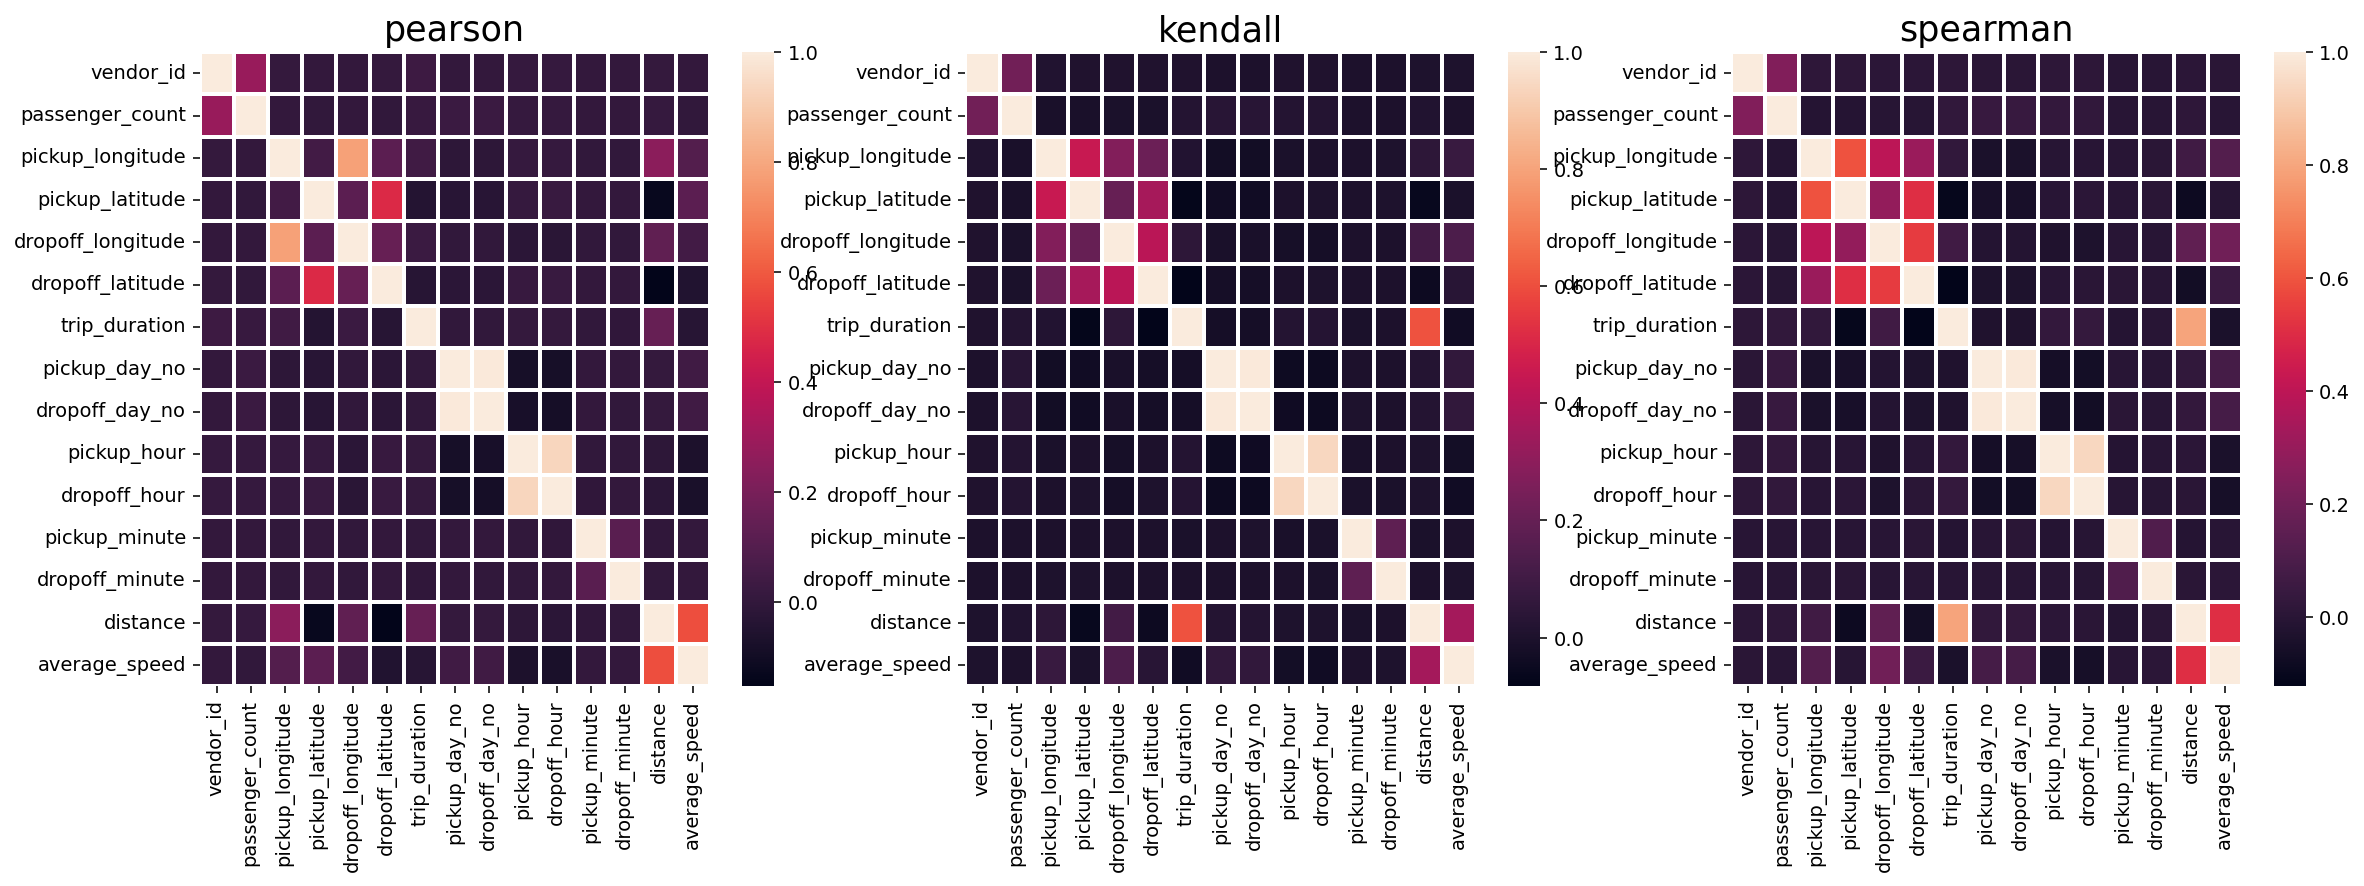

In [61]:
# Plotting heatmap for numerical variables

plt.figure(figsize=(20,6),dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical.dropna().corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=18)

OBSERVATIONS:

1) Similar Correlation pattern observed in Kendall and Spearman correlation.

2) Most of the variables have correlation which is insignificant.

3) Major correlation is between Drop of Hour and Pickup Hour.

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

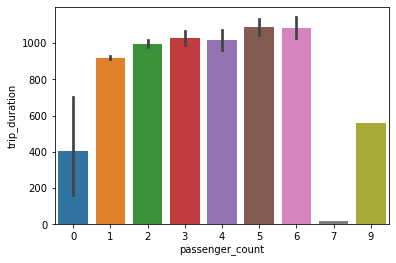

In [62]:
#Observing Passenger count and Trip Duration

sns.barplot(x='passenger_count', y = 'trip_duration', data=data)

OBSERVATIONS:

1) Majority of Trip Durations are between 800 to 1000 secs.

2) Trip Durations almost equal to 0 seconds can be outliers or due to trip being cancelled.

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

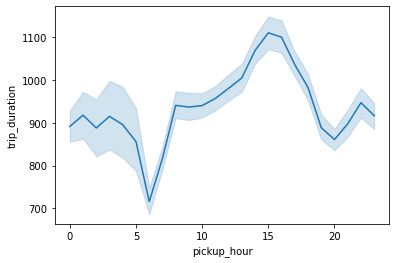

In [66]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)


<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

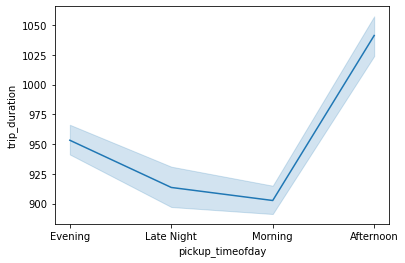

In [65]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

OBSERVATIONS:
    
1) Graph of pickup_hour vs trip_duration peaks at 15 hours. This implies the time period of 2:00pm-4:00pm has the longest trips.

2) The Graph of pickup_timeofday vs trip_duration also peaks in afternoon implying that in Afternoon longest trips take place.

In [76]:
#Performing T-test and Z-test on data

def PerformZtest(X1,X2,sigma1,sigma2,N1,N2):
    from numpy import sqrt,abs,round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1+sigma2**2/N2)
    z=(X1-X2)/ovr_sigma
    pval = 2*(1-norm.cdf(abs(z)))
    return pval

def PerformTtest(X1,X2,sd1,sd2,n1,n2):
    from numpy import sqrt, abs,round
    from scipy.stats import t as t_dist
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t=(X1-X2)/ovr_sd
    df=n1+n2-2
    pval = 2*(1-t_dist.cdf(abs(t),df))
    return pval

def Bivariate_cont_cat(data,cont,cat,category):
    #creating 2 samples
    x1= data[cont][data[cat]==category][:]
    x2= data[cont][~(data[cat]==category)][:]
    
    #calculating descriptives
    n1, n2 = x1.shape[0],x2.shape[0]
    m1, m2 = x1.mean(),x2.mean()
    std1, std2 = x1.std(), x2.mean()
    
    #calculating p-values
    
    t_p_val = PerformZtest(m1, m2, std1, std2, n1, n2)
    z_p_val = PerformTtest(m1, m2, std1, std2, n1, n2)
    
    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc=np.mean)
    
    #plotting
    plt.figure(figsize =(15,6), dpi=140)
    
    #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)],[m1,m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value ={}\n {}'.format(t_p_val,z_p_val,table))
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


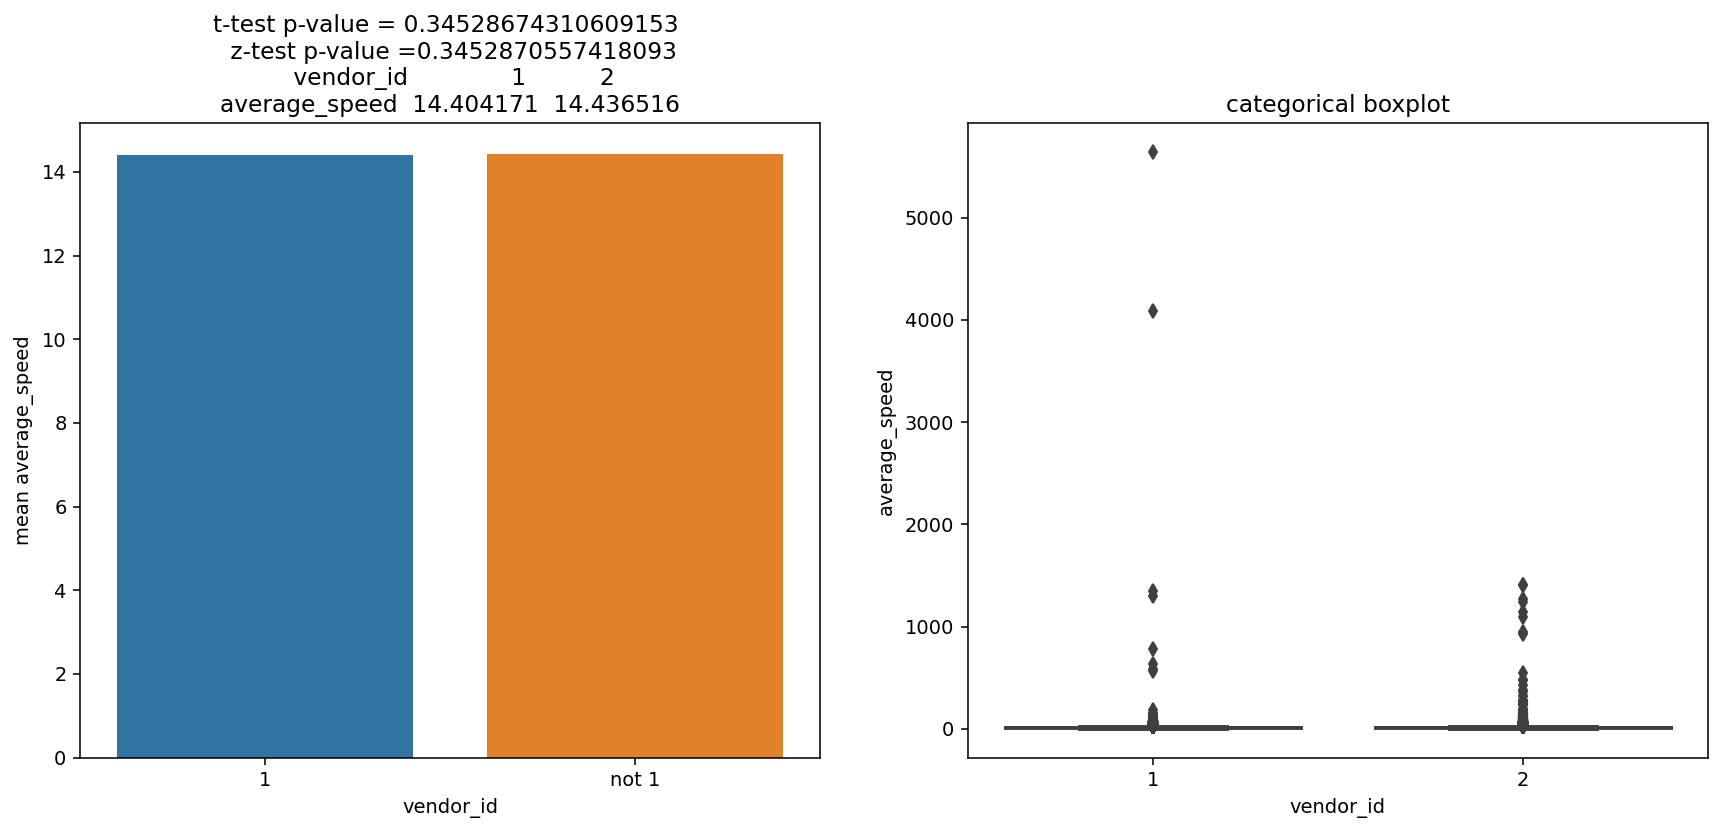

In [77]:
Bivariate_cont_cat(data,'average_speed','vendor_id',1)

OBSERVATIONS:

The average speed for both Vendor 1 and 2 are almost similar

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


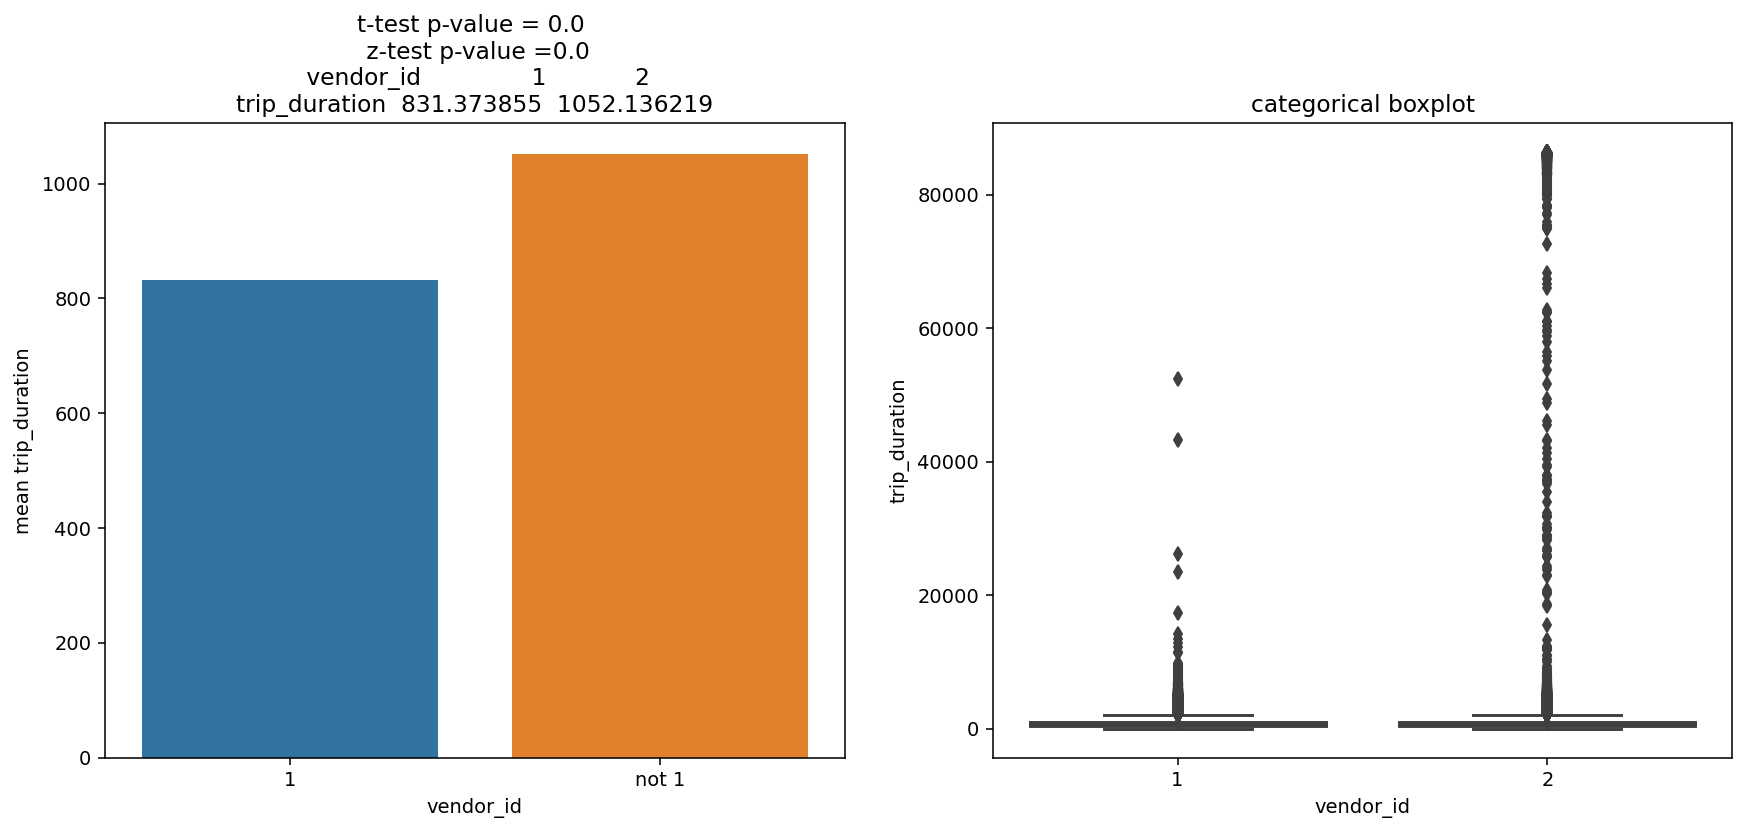

In [78]:
Bivariate_cont_cat(data, 'trip_duration','vendor_id',1)

OBSERVATIONS:

Vendor 2 offers long trips as compared to Vendor 1. There are a lot of outliers in the Dataset

## MULTIVARIATE ANALYSIS

In [79]:
#Calculating the correlation

corr =data.corr()

<AxesSubplot:>

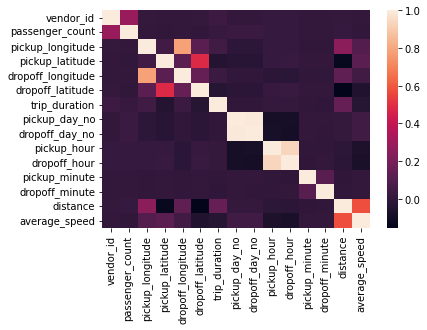

In [80]:
sns.heatmap(corr)

OBSERVATIONS:

1) Strongest Correlation between Pickup Day and Dropp off Day.

2) Medium Correlation average spped and distance.


Text(0, 0.5, 'mean(trip_duration)')

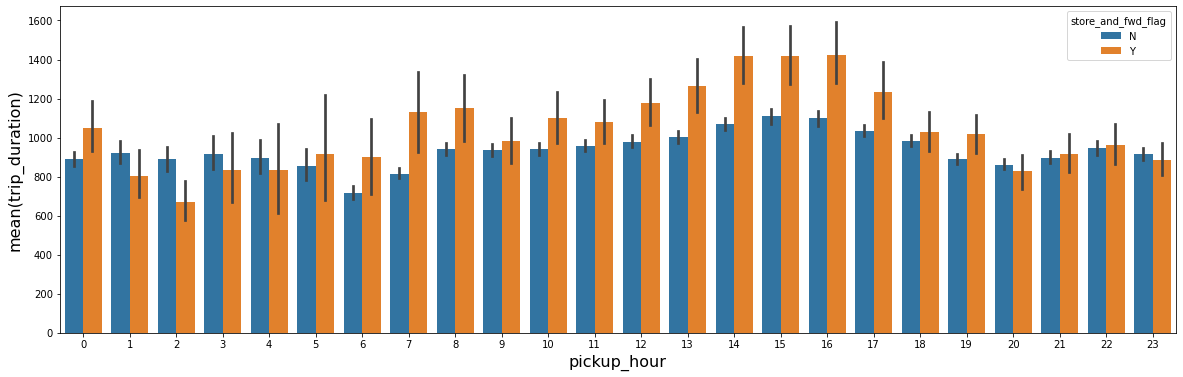

In [84]:
#Observing Pickup hour, Trip Duration, Store and FWD Flag

plt.figure(figsize=(20,6))
sns.barplot(x='pickup_hour',y='trip_duration',data=data,hue='store_and_fwd_flag')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

OBSERVATIONS:
    
During the Long Trips the Flags were recorded as compared to shorter trips.


Text(0.5, 1.0, 'Pickup hr vs speed')

<Figure size 1440x864 with 0 Axes>

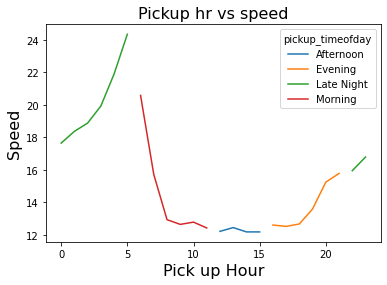

In [85]:
#Observing Pickup hour, Average speed and Pickup Time of Day

plt.figure(figsize=(20,12))
pd.pivot_table(data, index='pickup_hour',columns='pickup_timeofday',aggfunc=np.mean)['average_speed'].plot()
plt.xlabel('Pick up Hour',fontsize=16)
plt.ylabel('Speed',fontsize=16)
plt.title('Pickup hr vs speed',fontsize=16)

OBSERVATIONS:

1) During Midnight hours (12am-5am) the average speeds is in the range of 18kmph-24kmph. This implies low traffic in the city during night.

2) During morning and afternoon hours the average speeds reduce to 12-20kmph indicating the increase in the city traffic.